Размер датасета: (41, 5)

Первые 10 строк:


,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511



Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB

Описательные статистики:


,user_id,age,country,purchases,revenue
count,41.000000,39.000000,41,41.000000,41.000000
unique,NaN,NaN,5,NaN,NaN
top,NaN,NaN,RU,NaN,NaN
freq,NaN,NaN,13,NaN,NaN
mean,20.243902,36.512821,NaN,4.829268,820.048780
std,11.659289,18.304259,NaN,2.710189,613.127269
min,1.000000,5.000000,NaN,-1.000000,0.000000
25%,10.000000,24.000000,NaN,3.000000,432.000000
50%,20.000000,33.000000,NaN,5.000000,693.000000
75%,30.000000,45.500000,NaN,7.000000,1115.000000



ПРОПУСКИ
age    0.0488
dtype: float64

ДУБЛИКАТЫ
Полных дубликатов: 1
После удаления → 40 строк

ПОДОЗРИТЕЛЬНЫЕ ЗНАЧЕНИЯ
• Возраст < 10 или > 100: 2
• Отрицательные покупки: 1
• Нулевой revenue при purchases > 0: 1
• Покупки = 0, но revenue > 0: 0
-----------------
ВЫВОД ПО КАЧЕСТВУ ДАННЫХ------------------

Проблемы качества:
- 2 пропуска в возрасте
- 1 полная копия строки (удалена)
- Возраст 5 и 120 лет — явные ошибки
- 1 запись с отрицательным количеством покупок
- 4 пользователя купили что-то, но выручка 0
Данные требуют очистки перед анализом.


ТОП стран по количеству пользователей
country
FR    12
RU    12
US     8
DE     6
CN     2
Name: count, dtype: int64

Агрегация по странам


,users,total_revenue,total_purchases,avg_revenue,avg_purchases
country,,,,,
RU,12,9760,55,813.3,4.6
DE,6,8673,39,1445.5,6.5
FR,12,8111,51,675.9,4.2
US,8,4459,37,557.4,4.6
CN,2,2108,9,1054.0,4.5


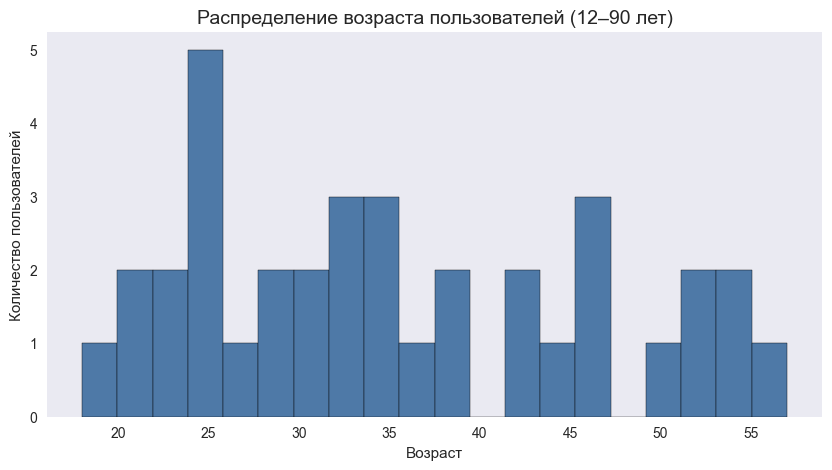

C:\Users\User\AppData\Local\Temp\ipykernel_19884\3386198592.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['country'].isin(top_countries)], x='country', y='revenue', palette="Set2")


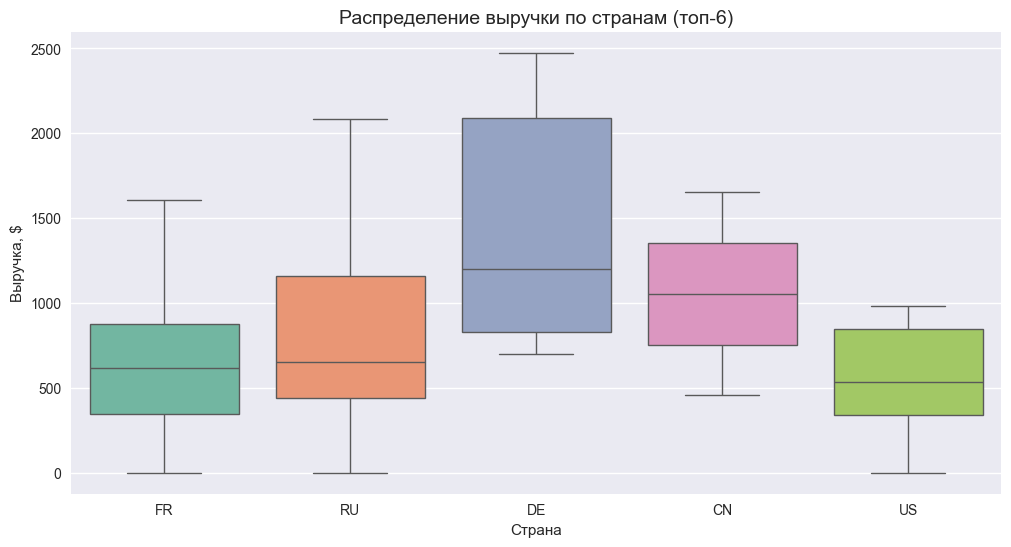

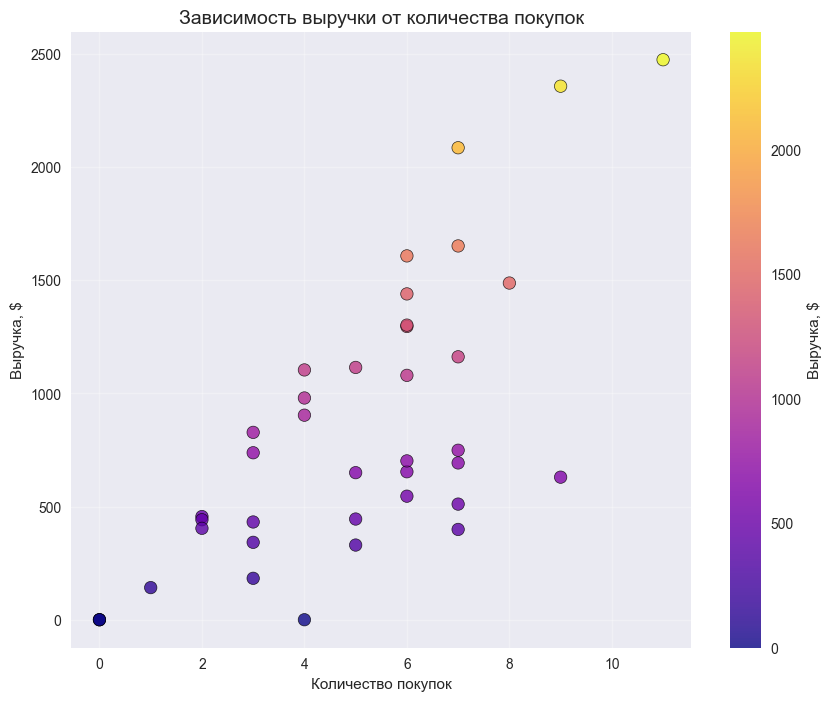

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


os.makedirs("figures", exist_ok=True)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

df = pd.read_csv("S02-hw-dataset.csv")
print("Размер датасета:", df.shape)
print("\nПервые 10 строк:")
display(df.head(10))
print("\nИнформация о данных:")
df.info()
print("\nОписательные статистики:")
display(df.describe(include="all"))

#2 Контроль качества ревизоро
print("\n" + "="*50)
print("ПРОПУСКИ")
print(df.isna().mean().round(4)[df.isna().mean() > 0])
print("\nДУБЛИКАТЫ")
print(f"Полных дубликатов: {df.duplicated().sum()}")
df = df.drop_duplicates().reset_index(drop=True)
print(f"После удаления → {df.shape[0]} строк")
print("\nПОДОЗРИТЕЛЬНЫЕ ЗНАЧЕНИЯ")
print(f"• Возраст < 10 или > 100: {df['age'].lt(10).sum() + df['age'].gt(100).sum()}")
print(f"• Отрицательные покупки: {(df['purchases'] < 0).sum()}")
print(f"• Нулевой revenue при purchases > 0: {((df['revenue'] == 0) & (df['purchases'] > 0)).sum()}")
print(f"• Покупки = 0, но revenue > 0: {((df['purchases'] == 0) & (df['revenue'] > 0)).sum()}")
print("\nВЫВОД ПО КАЧЕСТВУ ДАННЫХ".center(60, "-"))
print("""
Проблемы качества:
- 2 пропуска в возрасте
- 1 полная копия строки (удалена)
- Возраст 5 и 120 лет — явные ошибки
- 1 запись с отрицательным количеством покупок
- 4 пользователя купили что-то, но выручка 0
Данные требуют очистки перед анализом.
""")

#3 Сравниваем
print("\nТОП стран по количеству пользователей")
print(df['country'].value_counts())
print("\nАгрегация по странам")
country_stats = df.groupby('country').agg(
    users=('user_id', 'nunique'),
    total_revenue=('revenue', 'sum'),
    total_purchases=('purchases', 'sum'),
    avg_revenue=('revenue', 'mean'),
    avg_purchases=('purchases', 'mean')
).round(1).sort_values('total_revenue', ascending=False)

display(country_stats)

#4 Визуализуируем

# 1. Гистограмма возраста (без выбросов)
plt.figure(figsize=(10,5))
df_clean_age = df[df['age'].between(12, 90)]  # убираем 5 и 120
df_clean_age['age'].hist(bins=20, edgecolor='black', color='#4e79a7')
plt.title('Распределение возраста пользователей (12–90 лет)', fontsize=14)
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid(False)
plt.savefig("figures/age_histogram.png", dpi=200, bbox_inches='tight')
plt.show()

# 2. Boxplot выручки по странам
plt.figure(figsize=(12,6))
top_countries = df['country'].value_counts().head(6).index
sns.boxplot(data=df[df['country'].isin(top_countries)], x='country', y='revenue', palette="Set2")
plt.title('Распределение выручки по странам (топ-6)', fontsize=14)
plt.ylabel('Выручка, $')
plt.xlabel('Страна')
plt.savefig("figures/revenue_boxplot.png", dpi=200, bbox_inches='tight')
plt.show()

# 3. Scatter: покупки от выручки 
plt.figure(figsize=(10,8))
clean_scatter = df[df['purchases'] >= 0]
plt.scatter(clean_scatter['purchases'], clean_scatter['revenue'],
            c=clean_scatter['revenue'], cmap='plasma', alpha=0.8, edgecolors='k', linewidth=0.5, s=80)
plt.colorbar(label='Выручка, $')
plt.title('Зависимость выручки от количества покупок', fontsize=14)
plt.xlabel('Количество покупок')
plt.ylabel('Выручка, $')
plt.grid(True, alpha=0.3)
plt.savefig("figures/purchases_vs_revenue_scatter.png", dpi=200, bbox_inches='tight')
plt.show()
